Load libraries and set paths

In [1]:
import numpy as np
import pandas as pd
# To display all the columns
pd.options.display.max_columns = None
import os
import sys
import matplotlib.pyplot as plt
import json
import seaborn as sns

# Set paths
BASE_DIR = os.path.realpath(os.path.join(os.path.abspath(''),'../..'))
if not os.path.exists(BASE_DIR):
    raise Exception('Base path {} does not exist!'.format(BASE_DIR))
else:
    print('BASE_DIR: {}'.format(BASE_DIR))
    
DATA_DIR = '/home/hhughes/Documents/Master_Thesis/Project/datasets/184A1_hannah_EU_scalar_all_wells'
if not os.path.exists(DATA_DIR):
    raise Exception('Data path {} does not exist!'.format(DATA_DIR))
else:
    print('DATA_DIR: {}'.format(DATA_DIR))
    
# Add BASE_DIR to sys paths (for loading libraries)
sys.path.insert(1, os.path.join(BASE_DIR, 'workspace'))
# Load mpp_data library to convert raw data into images
from pelkmans.mpp_data import MPPData as MPPData

BASE_DIR: /home/hhughes/Documents/Master_Thesis/Project
DATA_DIR: /home/hhughes/Documents/Master_Thesis/Project/datasets/184A1_hannah_EU_scalar_all_wells
Setting BASE_DIR to /home/hhughes/Documents/Master_Thesis/Project


Load pre-processed data

In [8]:
print('Available files in data dir {}:\n{}'.format(DATA_DIR, os.listdir(DATA_DIR)))

# Load files
metadata = pd.read_csv(os.path.join(DATA_DIR, 'metadata.csv'))
channels = pd.read_csv(os.path.join(DATA_DIR, 'channels.csv'))
with open(os.path.join(DATA_DIR, 'params.json')) as params_file:
    param = json.load(params_file)


Available files in data dir /home/hhughes/Documents/Master_Thesis/Project/datasets/184A1_hannah_EU_scalar_all_wells:
['params.json', 'channels.csv', 'metadata.csv']


Take a look into the data

In [9]:
metadata

,Unnamed: 0,mapobject_id,plate_name,well_name,well_pos_y,well_pos_x,tpoint,zplane,label,is_border,mapobject_id_cell,plate_name_cell,well_name_cell,well_pos_y_cell,well_pos_x_cell,tpoint_cell,zplane_cell,label_cell,is_border_cell,is_mitotic,is_mitotic_labels,is_polynuclei_HeLa,is_polynuclei_HeLa_labels,is_polynuclei_184A1,is_polynuclei_184A1_labels,cell_cycle,cell_type,perturbation,duration,00_DAPI_avg,07_H2B_avg,01_CDK9_pT186_avg,03_CDK9_avg,05_GTF2B_avg,07_SETD1A_avg,08_H3K4me3_avg,09_SRRM2_avg,10_H3K27ac_avg,11_KPNA2_MAX_avg,12_RB1_pS807_S811_avg,13_PABPN1_avg,14_PCNA_avg,15_SON_avg,16_H3_avg,17_HDAC3_avg,19_KPNA1_MAX_avg,20_SP100_avg,21_NCL_avg,01_PABPC1_avg,02_CDK7_avg,03_RPS6_avg,05_Sm_avg,07_POLR2A_avg,09_CCNT1_avg,10_POL2RA_pS2_avg,11_PML_avg,12_YAP1_avg,13_POL2RA_pS5_avg,15_U2SNRNPB_avg,18_NONO_avg,20_ALYREF_avg,21_COIL_avg,00_BG488_avg,00_BG568_avg,00_EU_avg,09_SRRM2_ILASTIK_avg,15_SON_ILASTIK_avg
0,0,369581,plate01,I18,0,0,0,0,9,0,369487,plate01,I18,0,0,0,0,9,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,CX5461,120.0,44.790928,208.676435,15.962250,29.289384,84.024075,24.177410,46.880668,50.661738,107.367649,59.570214,95.348947,162.164103,75.340100,41.983402,233.016897,75.355192,83.016410,19.006747,47.585081,21.462703,119.898365,22.528784,45.912931,104.033265,80.562506,303.177564,11.478352,93.097852,221.812826,39.005296,287.133040,266.622592,7.860114,6.162881,1.671627,342.910464,7830.081611,10304.112271
1,1,369582,plate01,I18,0,0,0,0,10,0,369488,plate01,I18,0,0,0,0,10,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,CX5461,120.0,44.693453,192.564041,14.927710,32.759411,92.919336,27.445029,50.696422,53.129896,67.922149,41.104070,101.088256,191.014345,45.255686,49.039914,196.708995,66.276975,63.790027,21.981683,40.383979,14.368812,146.185885,19.856793,46.780805,132.973481,85.893447,288.406003,14.120230,102.825017,205.574996,42.433129,312.214706,231.791821,8.029727,6.515615,1.657841,182.502609,7826.491151,10242.813811
2,2,369583,plate01,I18,0,0,0,0,11,0,369489,plate01,I18,0,0,0,0,11,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,CX5461,120.0,40.628654,224.238141,11.883508,25.218904,88.832127,29.588301,46.845729,54.031310,61.636522,47.324893,120.000485,186.245955,58.354520,43.540287,263.274235,72.690354,76.520639,26.116184,47.600271,18.067183,125.463465,20.618981,52.433856,121.306955,80.992489,292.695766,13.591581,111.875495,221.776828,39.558433,333.519357,310.301499,8.908267,6.080175,1.548610,195.049564,6211.161568,10094.878316
3,3,369584,plate01,I18,0,0,0,0,12,0,369490,plate01,I18,0,0,0,0,12,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,CX5461,120.0,47.190139,255.008827,8.761640,22.483270,86.429829,7.113698,28.268655,50.675528,54.239803,39.124333,88.022382,157.279270,31.450823,28.895709,260.202417,59.677551,66.606941,10.139325,47.945185,16.539284,105.200716,20.212364,47.114630,55.256595,58.227016,254.808453,10.881472,98.594081,247.179793,37.353835,326.267001,289.691050,7.332875,5.868882,1.554583,192.862674,6784.361001,7852.095976
4,4,369585,plate01,I18,0,0,0,0,13,0,369491,plate01,I18,0,0,0,0,13,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,CX5461,120.0,44.595874,155.674791,22.491115,34.184902,118.482454,43.344288,51.013306,58.614662,52.146755,78.335567,127.013187,171.134241,75.371029,45.063884,164.659560,78.160541,86.018186,18.520590,35.027228,25.870875,225.888079,24.161104,54.150928,151.001520,112.756650,267.606364,18.161617,154.100137,183.721177,47.454413,289.719015,209.839964,9.956070,7.354605,1.695586,269.511643,7898.951239,9751.622238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5461,5461,293914,plate01,I20,5,4,0,0,27,0,293821,plate01,I20,5,4,0,0,27,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,Meayamycin,720.0,37.696375,245.748663,11.430950,26.824458,88.011386,28.505152,36.766654,47.985475,38.119658,66.079385,3.336728,166.632529,59.487417,41.456323,261.114814,66

In [10]:
channels

,Unnamed: 0,channel_id,name
0,0,0,00_DAPI
1,1,1,07_H2B
2,2,2,01_CDK9_pT186
3,3,3,03_CDK9
4,4,4,05_GTF2B
5,5,5,07_SETD1A
6,6,6,08_H3K4me3
7,7,7,09_SRRM2
8,8,8,10_H3K27ac
9,9,9,11_KPNA2_MAX


In [12]:
param

{'_comment': 'Save file name as reference ---------------------------------',
 'raw_data_dir': '/storage/groups/ml01/datasets/raw/20201020_Pelkmans_NascentRNA_hannah.spitzer',
 'dir_type': 'hannah',
 'perturbations_and_wells': {'184A1_hannah_CX5461': ['I18', 'J22', 'J09'],
  '184A1_hannah_AZD4573': ['I13', 'J21', 'J14', 'I17', 'J18'],
  '184A1_hannah_meayamycin': ['I12', 'I20', 'J17'],
  '184A1_hannah_DMSO': ['J16', 'I14'],
  '184A1_hannah_triptolide': ['I10', 'J15'],
  '184A1_hannah_TSA': ['J20', 'I16', 'J13'],
  '184A1_hannah_unperturbed': ['J10', 'I13', 'I09', 'I11', 'J18', 'J12']},
 'output_data_dir': '/storage/groups/ml01/workspace/andres.becker/master_thesis/datasets/184A1_hannah_EU_scalar_projection_vicb',
 'seed': 42,
 'input_channels': ['00_DAPI',
  '07_H2B',
  '01_CDK9_pT186',
  '03_CDK9',
  '05_GTF2B',
  '07_SETD1A',
  '08_H3K4me3',
  '09_SRRM2',
  '10_H3K27ac',
  '11_KPNA2_MAX',
  '12_RB1_pS807_S811',
  '13_PABPN1',
  '14_PCNA',
  '15_SON',
  '16_H3',
  '17_HDAC3',
  '19_KP

Normalize data

In [44]:
columns = [c+'_'+param['method'] for c in channels.name.values]

normalization_values = np.percentile(metadata[columns].values, 
                                     param['percentile'], 
                                     axis=0)
for i, col in enumerate(columns):
    metadata[col] /= normalization_values[i]

In [47]:
metadata

,Unnamed: 0,mapobject_id,plate_name,well_name,well_pos_y,well_pos_x,tpoint,zplane,label,is_border,mapobject_id_cell,plate_name_cell,well_name_cell,well_pos_y_cell,well_pos_x_cell,tpoint_cell,zplane_cell,label_cell,is_border_cell,is_mitotic,is_mitotic_labels,is_polynuclei_HeLa,is_polynuclei_HeLa_labels,is_polynuclei_184A1,is_polynuclei_184A1_labels,cell_cycle,cell_type,perturbation,duration,00_DAPI_avg,07_H2B_avg,01_CDK9_pT186_avg,03_CDK9_avg,05_GTF2B_avg,07_SETD1A_avg,08_H3K4me3_avg,09_SRRM2_avg,10_H3K27ac_avg,11_KPNA2_MAX_avg,12_RB1_pS807_S811_avg,13_PABPN1_avg,14_PCNA_avg,15_SON_avg,16_H3_avg,17_HDAC3_avg,19_KPNA1_MAX_avg,20_SP100_avg,21_NCL_avg,01_PABPC1_avg,02_CDK7_avg,03_RPS6_avg,05_Sm_avg,07_POLR2A_avg,09_CCNT1_avg,10_POL2RA_pS2_avg,11_PML_avg,12_YAP1_avg,13_POL2RA_pS5_avg,15_U2SNRNPB_avg,18_NONO_avg,20_ALYREF_avg,21_COIL_avg,00_BG488_avg,00_BG568_avg,00_EU_avg,09_SRRM2_ILASTIK_avg,15_SON_ILASTIK_avg
0,0,369581,plate01,I18,0,0,0,0,9,0,369487,plate01,I18,0,0,0,0,9,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,CX5461,120.0,0.767395,0.757547,0.797301,0.720894,0.708606,0.592251,0.746799,0.691595,0.984294,0.588726,0.705438,0.735335,0.741460,0.740155,0.637486,0.701028,0.650782,0.511665,0.700621,0.672632,0.713828,0.729080,0.669047,0.633317,0.647626,0.994256,0.539982,0.557237,0.738784,0.604311,0.774023,0.618072,0.701158,0.704167,0.912859,0.974647,0.798957,0.787125
1,1,369582,plate01,I18,0,0,0,0,10,0,369488,plate01,I18,0,0,0,0,10,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,CX5461,120.0,0.765725,0.699055,0.745627,0.806301,0.783623,0.672295,0.807583,0.725289,0.622677,0.406227,0.747900,0.866157,0.445384,0.864559,0.538155,0.616573,0.500063,0.591750,0.594595,0.450313,0.870334,0.642609,0.681694,0.809494,0.690481,0.945814,0.664265,0.615459,0.684701,0.657419,0.841636,0.537329,0.716288,0.744470,0.905330,0.518723,0.798590,0.782443
2,2,369583,plate01,I18,0,0,0,0,11,0,369489,plate01,I18,0,0,0,0,11,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,CX5461,120.0,0.696084,0.814040,0.593571,0.620708,0.749154,0.724797,0.746243,0.737594,0.565054,0.467707,0.887822,0.844535,0.574296,0.767602,0.720264,0.676237,0.599861,0.703052,0.700844,0.566218,0.746961,0.667275,0.764071,0.738473,0.651083,0.959882,0.639395,0.669631,0.738664,0.612881,0.899067,0.719327,0.794658,0.694717,0.845680,0.554385,0.633767,0.771142
3,3,369584,plate01,I18,0,0,0,0,12,0,369490,plate01,I18,0,0,0,0,12,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,CX5461,120.0,0.808501,0.925745,0.437637,0.553376,0.728895,0.174258,0.450314,0.691784,0.497244,0.386661,0.651233,0.713185,0.309523,0.509423,0.711860,0.555179,0.522145,0.272952,0.705923,0.518334,0.626324,0.654116,0.686558,0.336382,0.468076,0.835632,0.511902,0.590135,0.823273,0.578725,0.879517,0.671548,0.654126,0.670575,0.848942,0.548169,0.692255,0.599817
4,4,369585,plate01,I18,0,0,0,0,13,0,369491,plate01,I18,0,0,0,0,13,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,CX5461,120.0,0.764054,0.565138,1.123412,0.841386,0.999207,1.061764,0.812631,0.800163,0.478056,0.774182,0.939706,0.776010,0.741764,0.794463,0.450475,0.727126,0.674314,0.498577,0.515725,0.810783,1.344850,0.781906,0.789092,0.919243,0.906429,0.877602,0.854386,0.922366,0.611914,0.735214,0.780994,0.486441,0.888127,0.840333,0.925943,0.766027,0.805984,0.744921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5461,5461,293914,plate01,I20,5,4,0,0,27,0,293821,plate01,I20,5,4,0,0,27,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,Meayamycin,720.0,0.645846,0.892129,0.570966,0.660225,0.742233,0.698264,0.585685,0.655061,0.349462,0.653055,0.024687,0.755597,0.585445,0.730862,0.714356,0.614341,0.580837,0.428317,0.974323,0.425216,0.627949,0.722829,0.807609,0.351446,0.530196,0.602222,0.500472,0.865436,0.710153,0.608617,0.830802,0.996811,0.755768,0.661710,0.925527,0.635906,0.584675,0.629998
5462,5462,293915,plate01,I20,5,4,0,0,28,0,293822,plate01,I20,5,4,0

## Create Stacked DataFrame for plots

In [57]:
channel_ids = channels.channel_id.values
n_chanels = len(channel_ids)

# Select the columns that we are interested in
columns = ['mapobject_id','well_name_cell','cell_cycle','perturbation']
columns += [c+'_'+param['method'] for c in channels.name.values]
scalar_data = metadata[columns]

# Set as index all the columns thats you dont want to be stacked
scalar_data = scalar_data.set_index(['mapobject_id', 'well_name_cell', 'cell_cycle', 'perturbation']).stack().reset_index()

# Set correct column names
scalar_data.columns = ['mapobject_id', 'well_name_cell', 'cell_cycle', 'perturbation', 'channel', param['method']]

# Remove "avg" from channel name
scalar_data.channel = np.array([s[:-(len(param['method'])+1)] for s in scalar_data.channel.values])

# Take a look into the stacked data frame
scalar_data

,mapobject_id,well_name_cell,cell_cycle,perturbation,channel,avg
0,369581,I18,S,CX5461,00_DAPI,0.767395
1,369581,I18,S,CX5461,07_H2B,0.757547
2,369581,I18,S,CX5461,01_CDK9_pT186,0.797301
3,369581,I18,S,CX5461,03_CDK9,0.720894
4,369581,I18,S,CX5461,05_GTF2B,0.708606
...,...,...,...,...,...,...
207703,293920,I20,S,Meayamycin,00_BG488,0.659139
207704,293920,I20,S,Meayamycin,00_BG568,0.914676
207705,293920,I20,S,Meayamycin,00_EU,0.645995
207706,293920,I20,S,Meayamycin,09_SRRM2_ILASTIK,0.677679


## Channel distribution

Take a look into the population distribution for each channel:

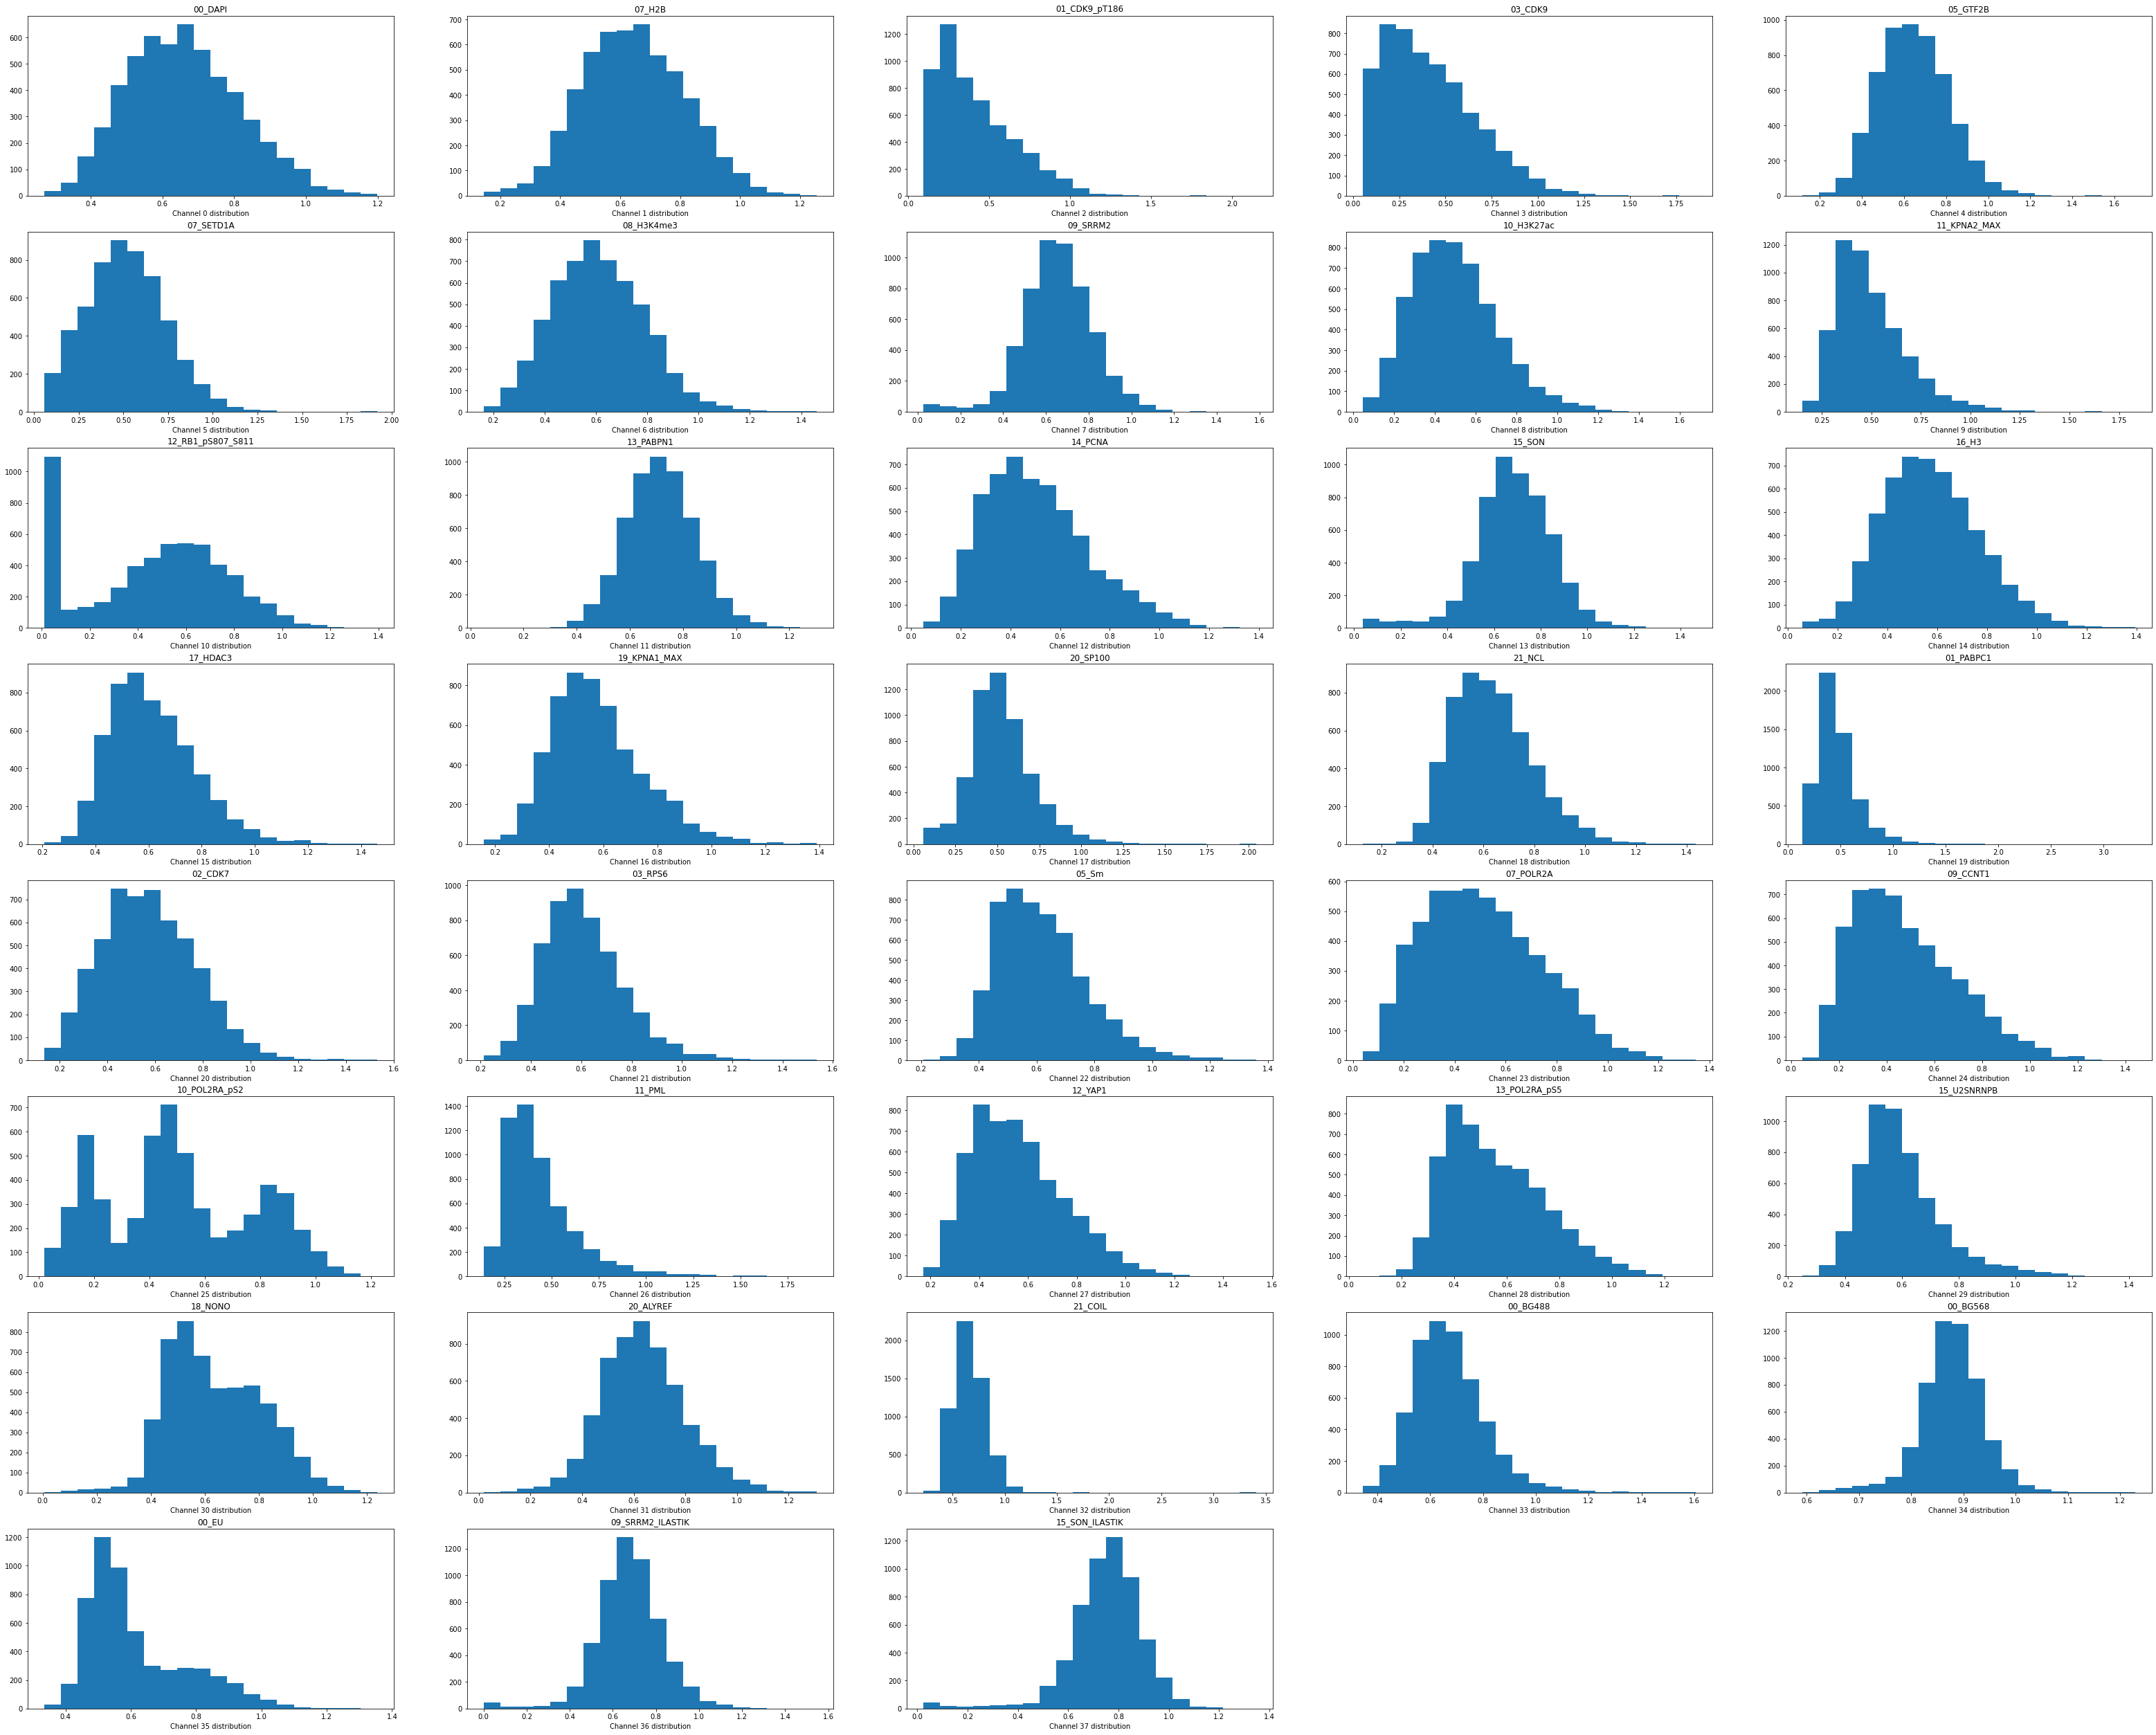

In [69]:
plt.figure(figsize=(55,45))
for c in range(n_chanels):
    plt.subplot(8,5,c+1)
    
    c_name = channels.set_index('channel_id').loc[c].values[1]
    temp = scalar_data[scalar_data.channel == c_name][param['method']]
    plt.hist(temp, bins=20)
    plt.title(c_name)
    plt.xlabel('Channel '+str(c)+' distribution')
    #_ = plt.ylabel('Count')
del(temp)
plt.show()

Now lets see if the distribution per channel also depends on the well: 

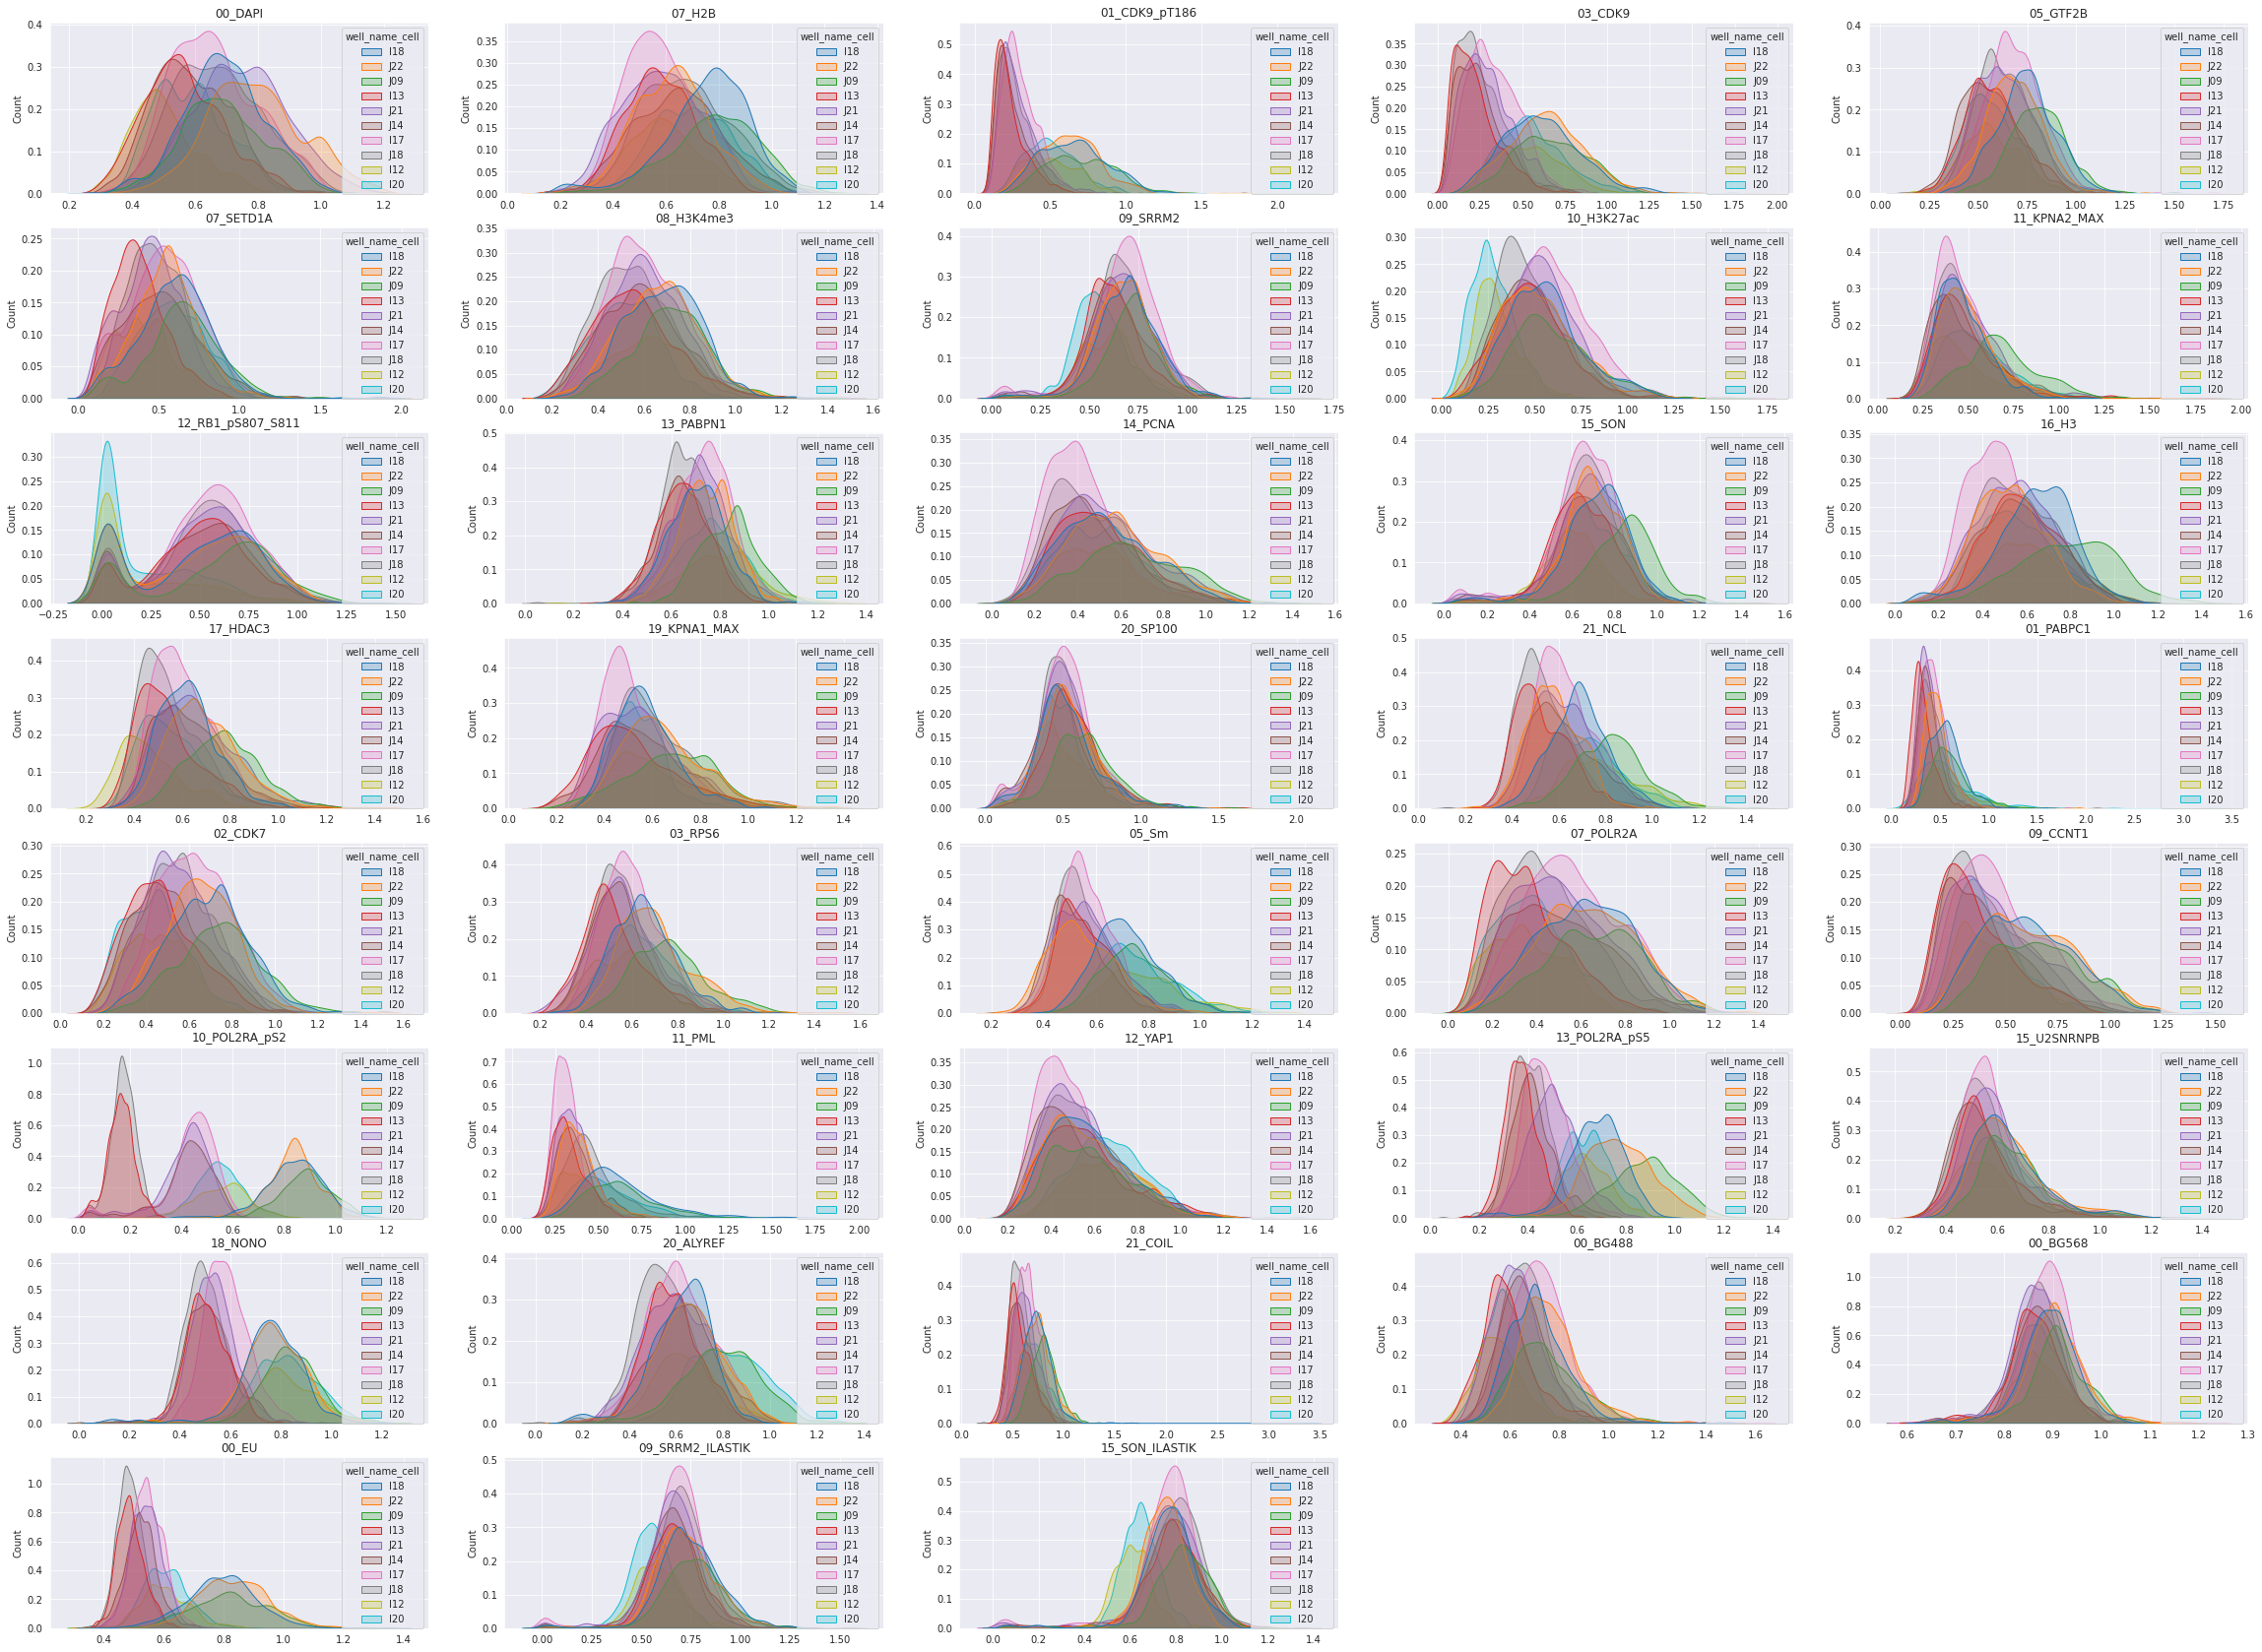

In [71]:
sns.set_style('darkgrid')
plt.figure(figsize=(40,30))

for c in range(n_chanels):
    plt.subplot(8,5,c+1)
    c_name = channels.set_index('channel_id').loc[c].values[1]
    
    temp = scalar_data[scalar_data.channel == c_name]
    
    sns.kdeplot(x=param['method'], hue='well_name_cell', data=temp, shade=True, bw_method=0.2)
    plt.title(c_name)
    plt.xlabel('')
    _ = plt.ylabel('Count')

plt.show()

Now lets see if the distribution per channel also depends on the perturbation: 

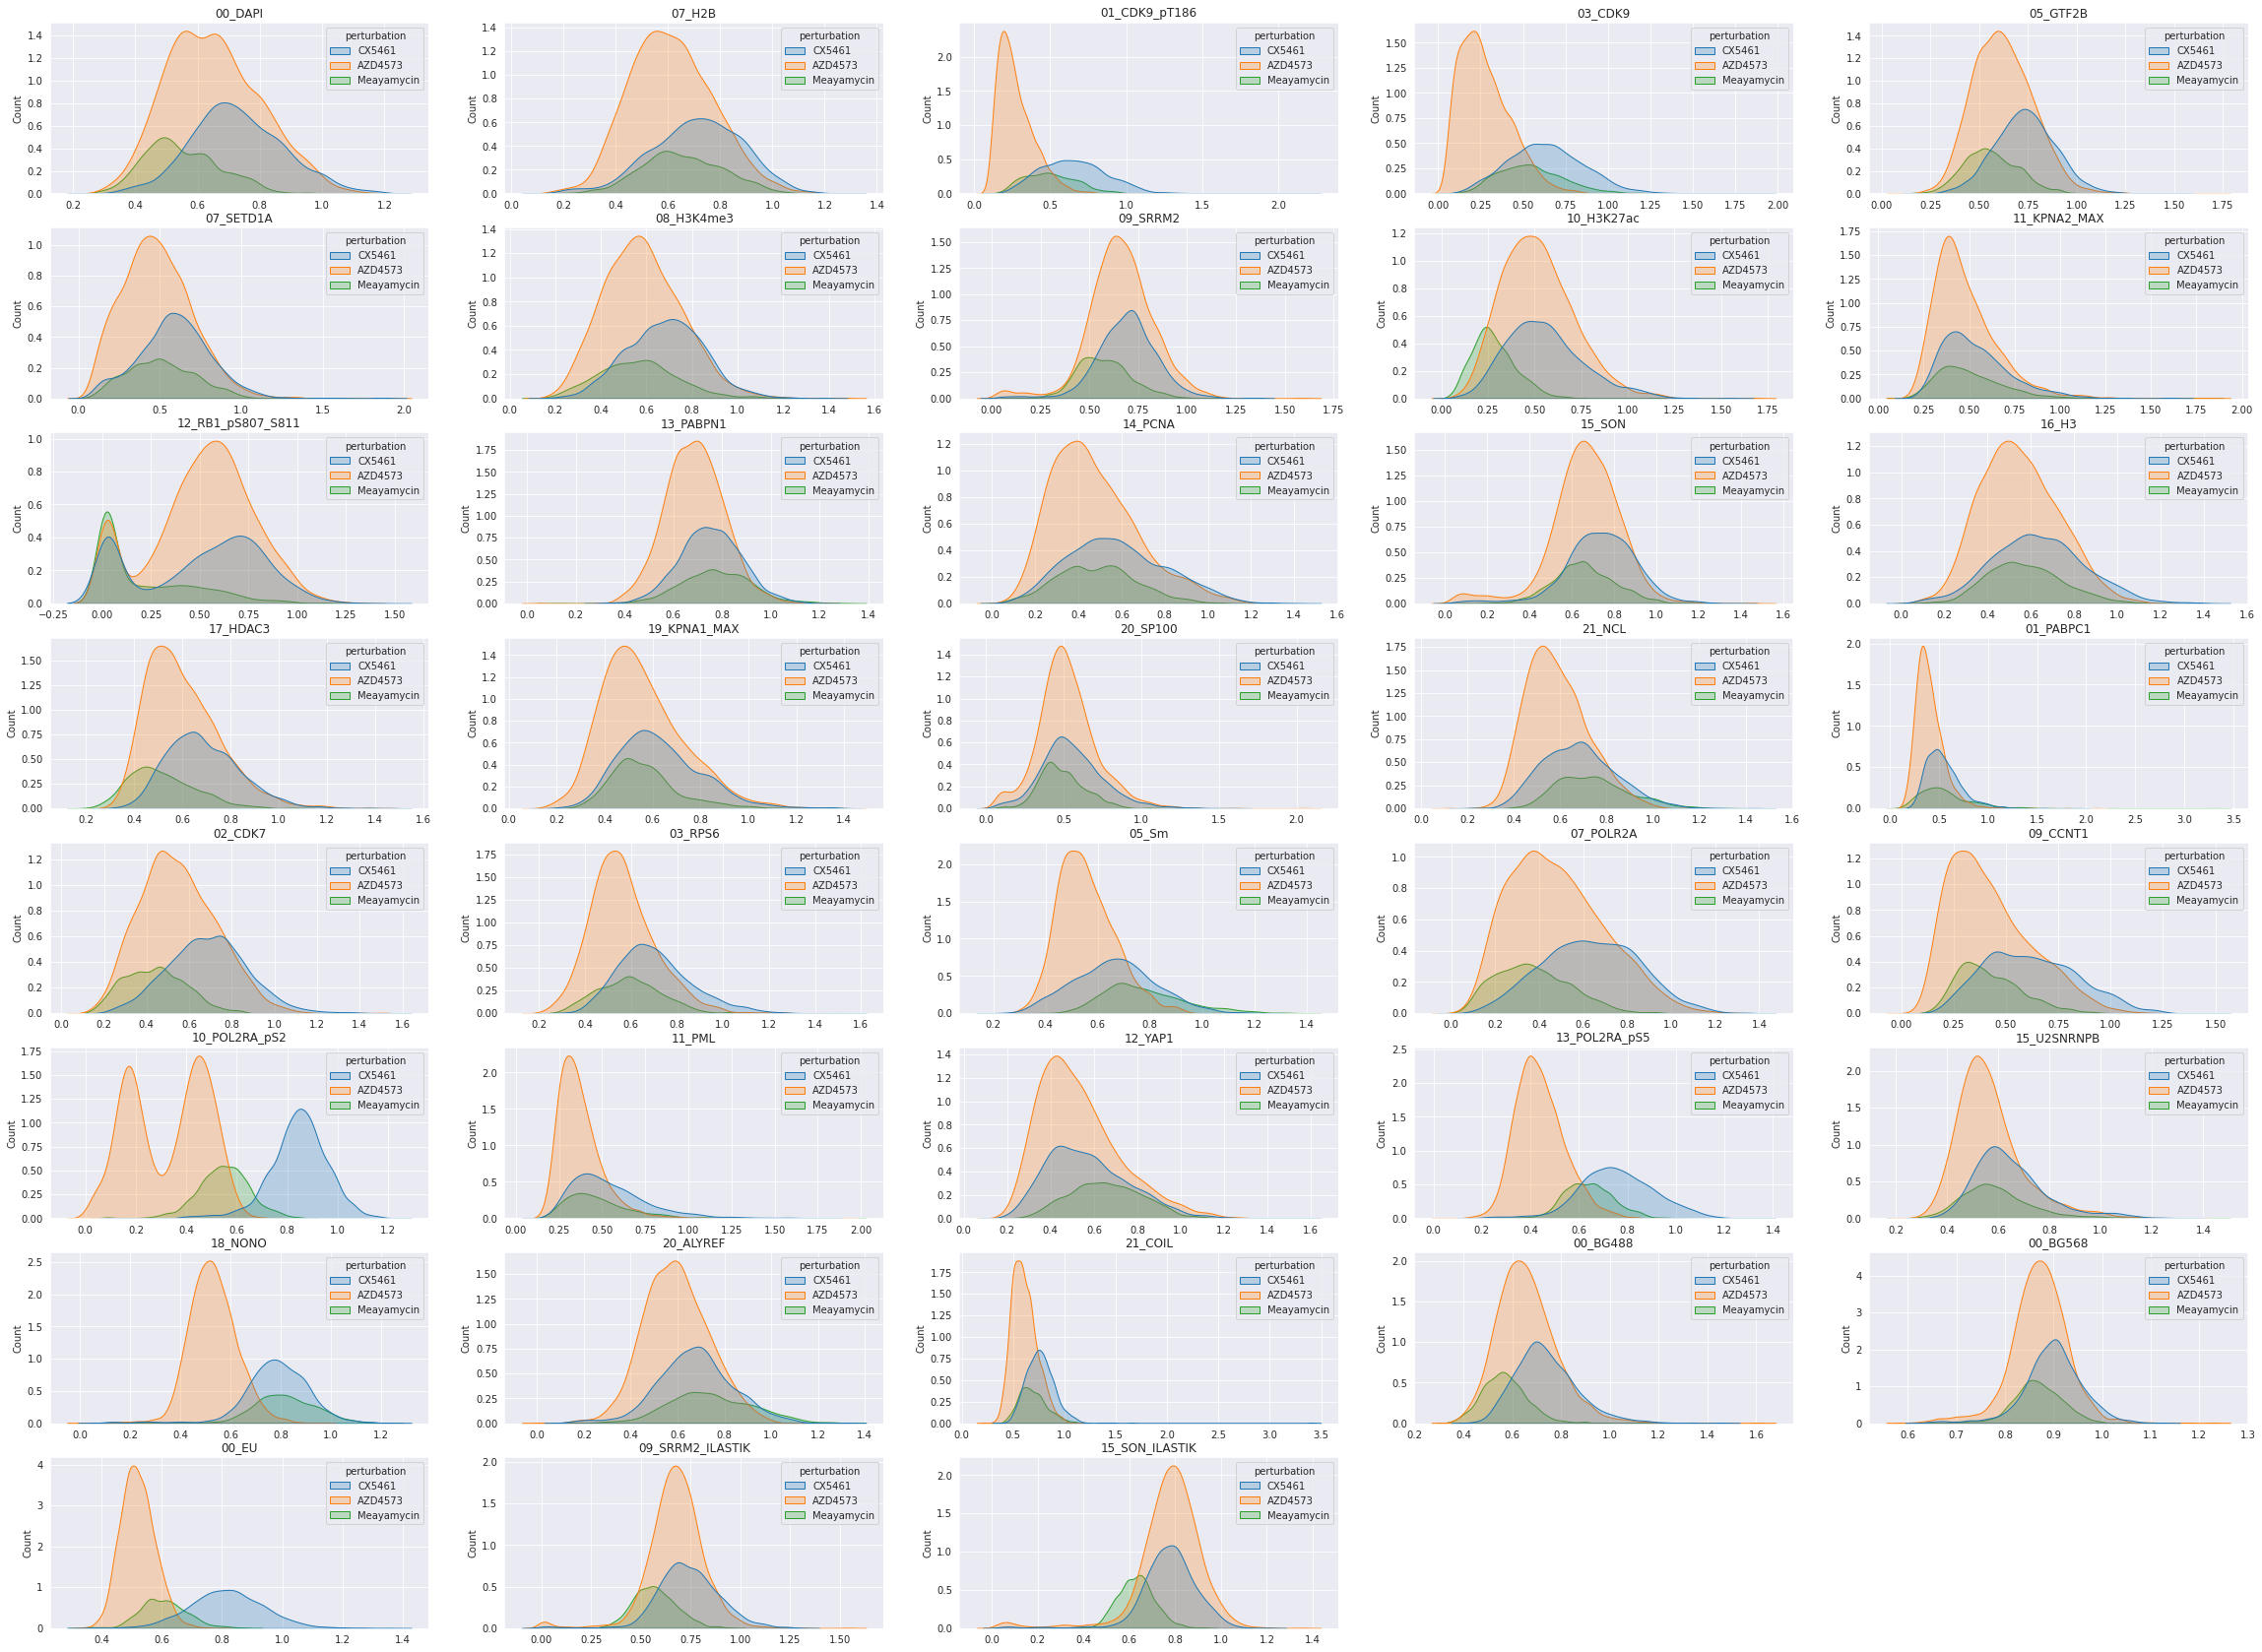

In [72]:
sns.set_style('darkgrid')
plt.figure(figsize=(40,30))

for c in range(n_chanels):
    plt.subplot(8,5,c+1)
    c_name = channels.set_index('channel_id').loc[c].values[1]    
    temp = scalar_data[scalar_data.channel == c_name]
    
    sns.kdeplot(x=param['method'], hue='perturbation', data=temp, shade=True, bw_method=0.2)
    plt.title(c_name)
    plt.xlabel('')
    _ = plt.ylabel('Count')

plt.show()

Now lets see if the distribution per channel also depends on the cell cycle: 

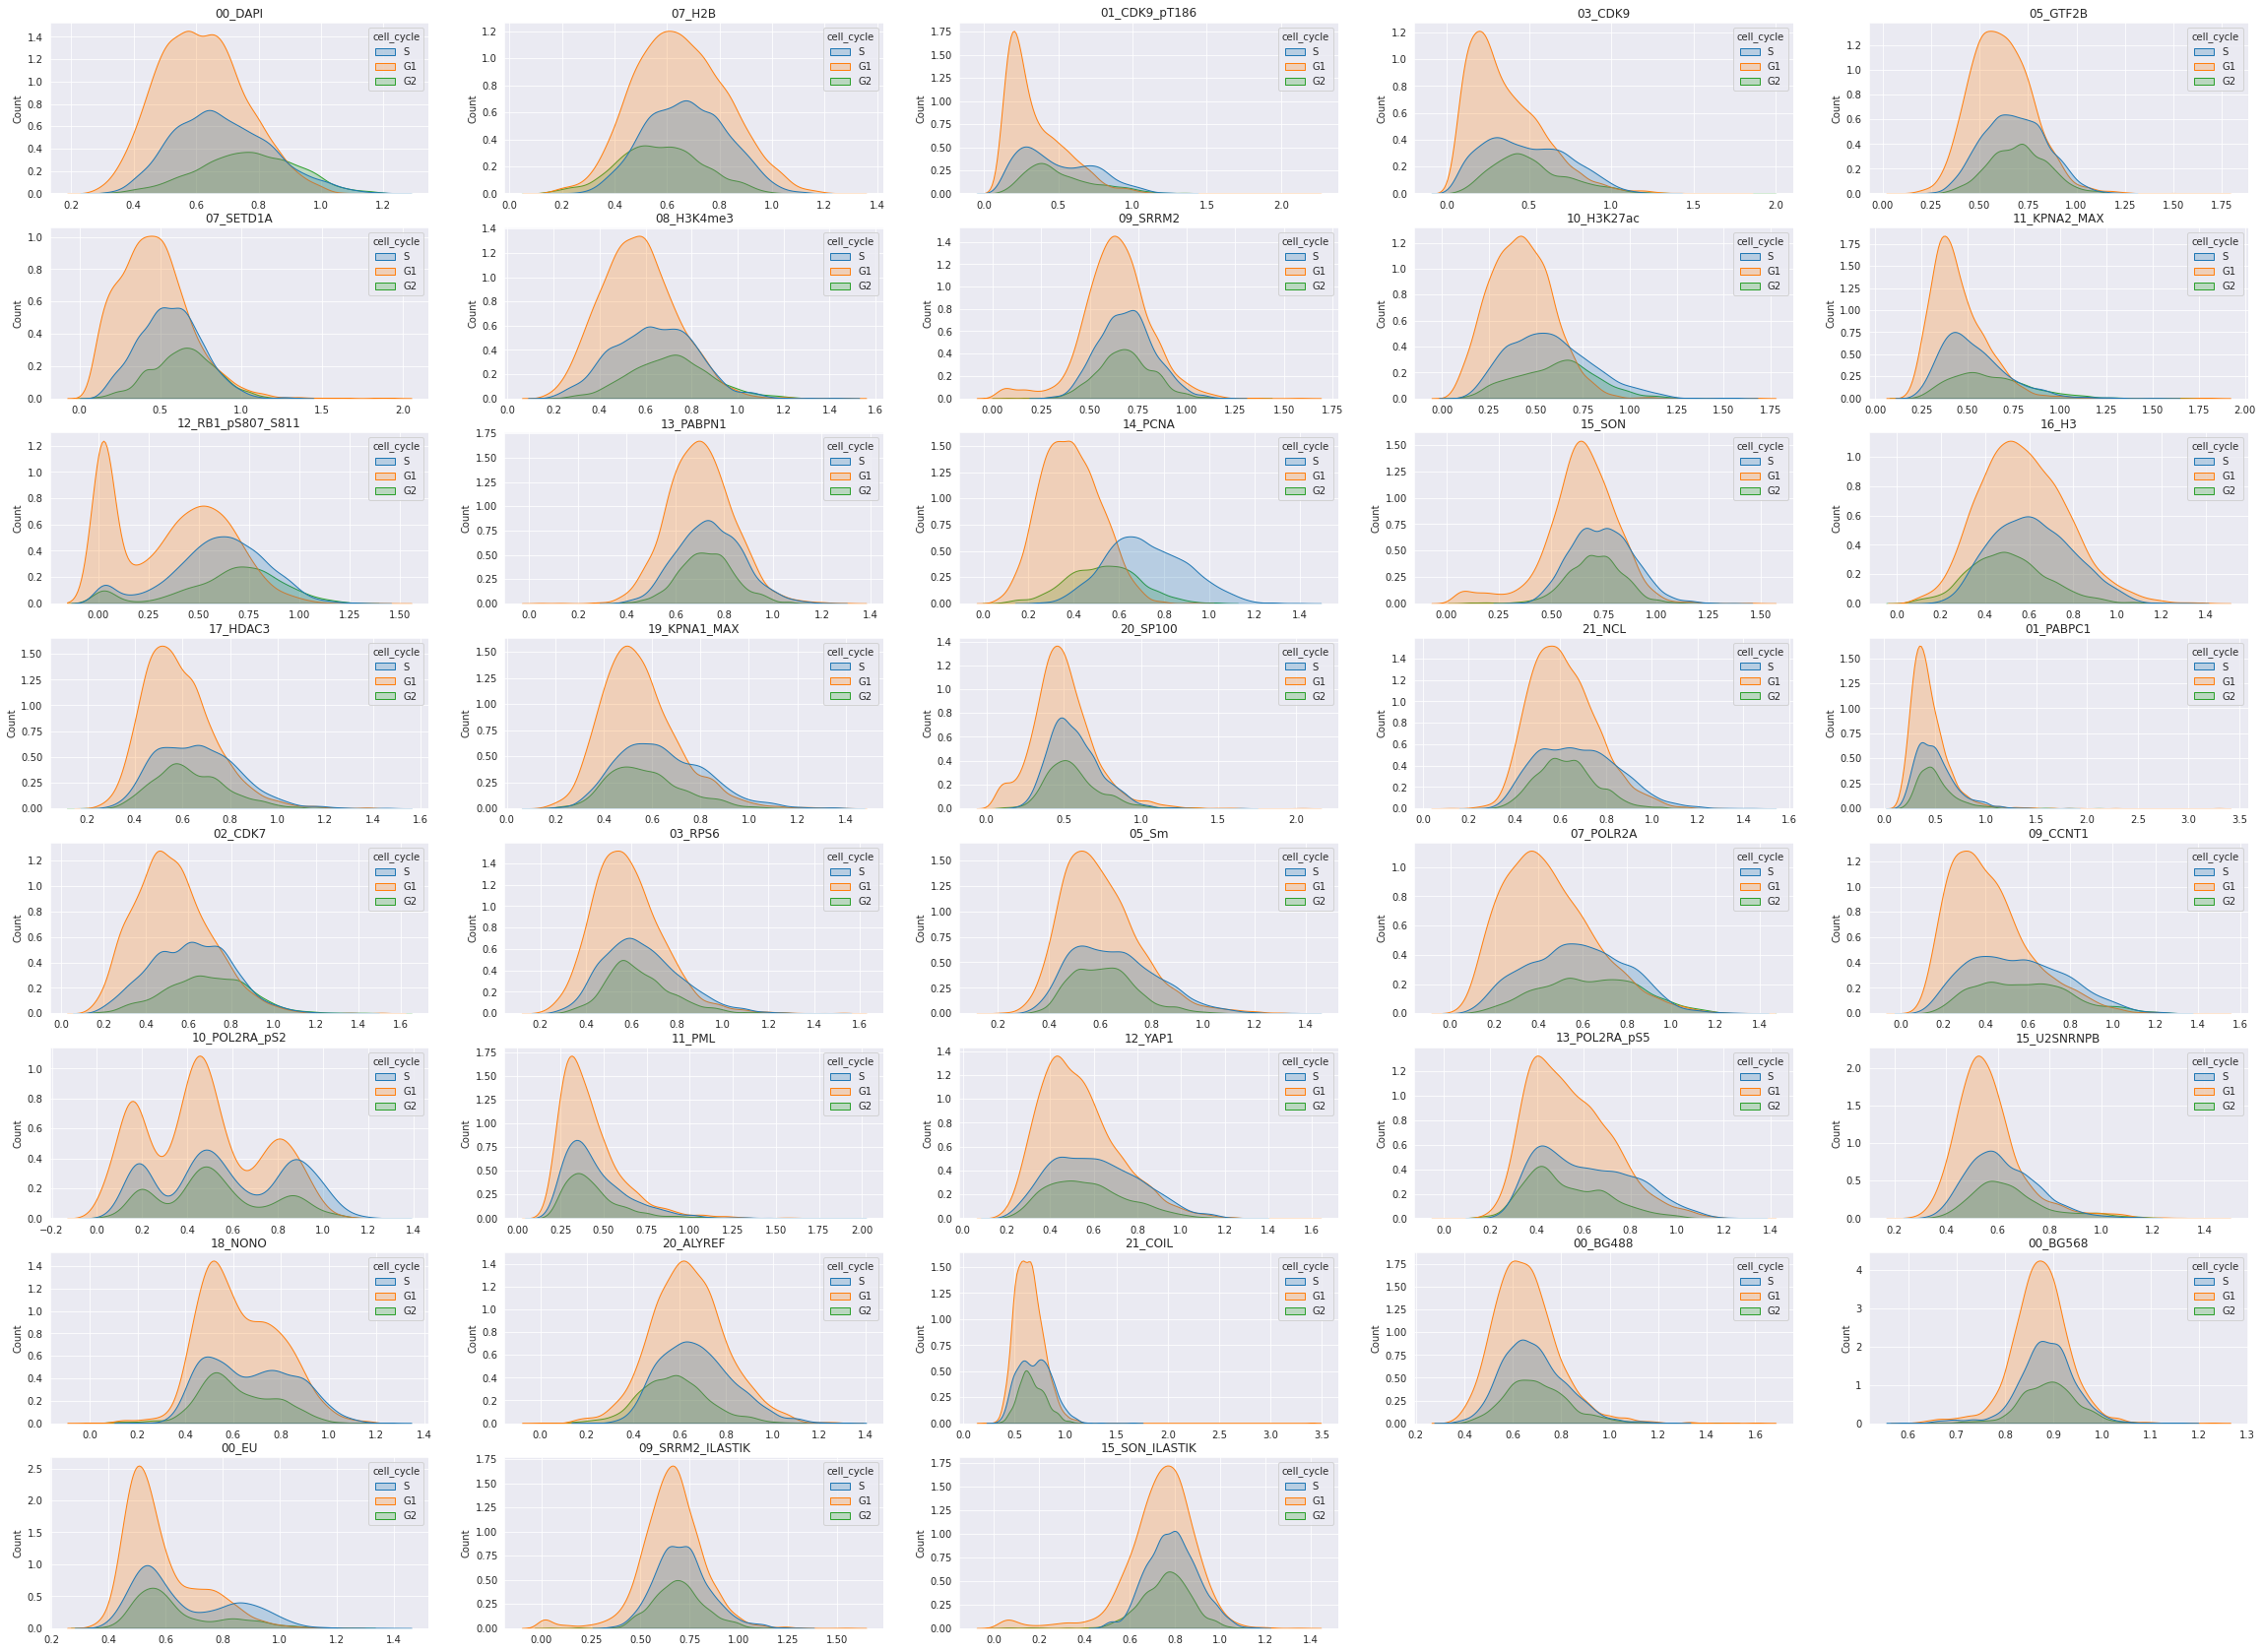

In [73]:
sns.set_style('darkgrid')
plt.figure(figsize=(40,30))

for c in range(n_chanels):
    plt.subplot(8,5,c+1)
    c_name = channels.set_index('channel_id').loc[c].values[1]
    
    temp = scalar_data[scalar_data.channel == c_name]
    
    sns.kdeplot(x=param['method'], hue='cell_cycle', data=temp, shade=True, bw_method=0.2)
    plt.title(c_name)
    plt.xlabel('')
    _ = plt.ylabel('Count')

plt.show()